In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Decision Trees

In [32]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(12345)
e = np.asarray([np.insert(x,2,1) for x in np.random.multivariate_normal([3,0],[[2,0],[0,1]], size=35)])
n = np.asarray([np.insert(x,2,2) for x in np.random.multivariate_normal([0,3],[[2,0],[0,1]], size=35)])
w = np.asarray([np.insert(x,2,3) for x in np.random.multivariate_normal([-3,0],[[2,0],[0,1]], size=35)])
s = np.asarray([np.insert(x,2,4) for x in np.random.multivariate_normal([0,-3],[[2,0],[0,1]], size=35)])

In [33]:
X = np.concatenate((e[:,:-1],n[:,:-1],w[:,:-1],s[:,:-1]))
y = np.concatenate((e[:,-1],n[:,-1],w[:,-1],s[:,-1]))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [35]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
result = confusion_matrix(y_test, y_pred)
result

array([[17,  0,  0,  2],
       [ 1,  9,  0,  0],
       [ 1,  2, 10,  1],
       [ 0,  0,  0, 13]])

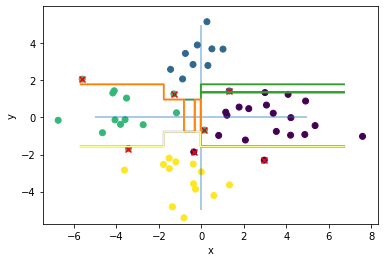

In [40]:
wrong_pred = X_test[y_pred != y_test]

plt.scatter(X_test[:,0],X_test[:,1], c=y_test)
plt.scatter(wrong_pred[:,0],wrong_pred[:,1], marker='x',c='r')
plt.vlines(0,-5,5,alpha=0.5);plt.hlines(0,-5,5,alpha=0.5)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### kNNs

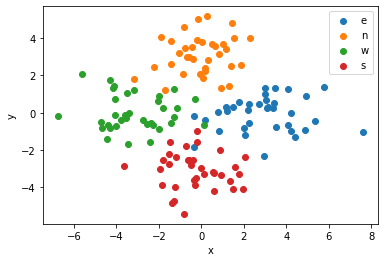

In [42]:
plt.scatter(e[:,0], e[:,1], label='e')
plt.scatter(n[:,0], n[:,1], label='n')
plt.scatter(w[:,0], w[:,1], label='w')
plt.scatter(s[:,0], s[:,1], label='s')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:") # Actual on left and Predicted on top
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",) #Macro is taking each class's accuracy and averaging them all (treated the same weight), micro/weighted is opposite and weights the averages/accuracies
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2) #correct/total

Confusion Matrix:
[[17  0  0  2]
 [ 0 10  0  0]
 [ 0  0 13  1]
 [ 0  0  1 12]]
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.89      0.94        19
         2.0       1.00      1.00      1.00        10
         3.0       0.93      0.93      0.93        14
         4.0       0.80      0.92      0.86        13

    accuracy                           0.93        56
   macro avg       0.93      0.94      0.93        56
weighted avg       0.94      0.93      0.93        56

Accuracy: 0.9285714285714286


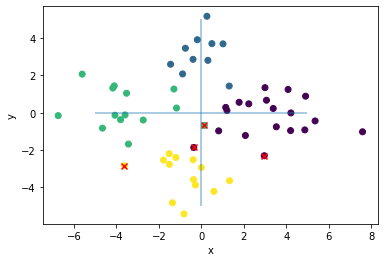

In [46]:
wrong_pred = X_test[y_pred != y_test]
#plt.scatter(X_train[:,0], X_train[:,1], c=y_train,alpha=0.50)
plt.scatter(X_test[:,0],X_test[:,1], c=y_test)
plt.scatter(wrong_pred[:,0],wrong_pred[:,1], marker='x',c='r')
plt.xlabel('x'); plt.ylabel('y')
plt.vlines(0,-5,5,alpha=0.5);plt.hlines(0,-5,5,alpha=0.5)
plt.show()

Let's see how our accuracy changes as our data becomes more messy

In [99]:
def knn(neighbors):
    classifier = KNeighborsClassifier(n_neighbors = neighbors)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    result = accuracy_score(y_test,y_pred)
    print("Accuracy:",result) #correct/total
    return result

Accuracy: 0.9107142857142857
Accuracy: 0.9107142857142857
Accuracy: 0.9285714285714286
Accuracy: 0.9285714285714286
Accuracy: 0.9107142857142857
Accuracy: 0.9464285714285714
Accuracy: 0.9464285714285714
Accuracy: 0.9285714285714286
Accuracy: 0.9285714285714286
Accuracy: 0.9285714285714286
Accuracy: 0.9107142857142857
Accuracy: 0.9107142857142857
Accuracy: 0.9107142857142857
Accuracy: 0.9107142857142857
Accuracy: 0.9107142857142857
Accuracy: 0.8928571428571429
Accuracy: 0.8928571428571429
Accuracy: 0.9107142857142857
Accuracy: 0.8928571428571429
Accuracy: 0.8928571428571429
Accuracy: 0.8928571428571429
Accuracy: 0.8928571428571429
Accuracy: 0.8928571428571429
Accuracy: 0.8928571428571429
Accuracy: 0.8928571428571429
Accuracy: 0.8928571428571429
Accuracy: 0.875
Accuracy: 0.8928571428571429
Accuracy: 0.8928571428571429
Accuracy: 0.8928571428571429
Accuracy: 0.8928571428571429
Accuracy: 0.875
Accuracy: 0.875
Accuracy: 0.875


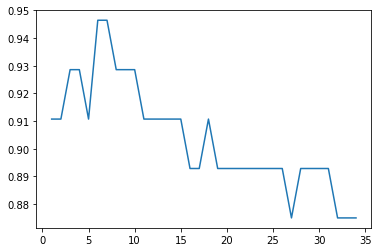

In [100]:
result = []
neigh = []
for i in range(1, 35):
    neigh.append(i)
    result.append(knn(i))

plt.plot(neigh,result)

### Support Vector Machine
#### Part 1 (SVM); Artifical data

Create artifical data

In [21]:
data = []
for i in range(0,1000):
    point = [np.random.uniform(-5,5),np.random.uniform(-5,5)]
    if point[0]**2 + point[1]**2 < 5:
        point.append(0)
    else:
        point.append(1)
    data.append(point)

data = np.asarray(data)

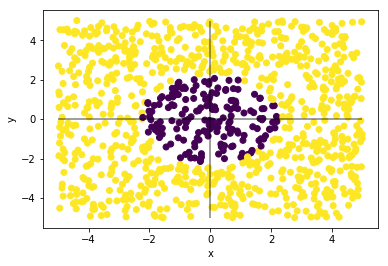

In [22]:
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.vlines(0,-5,5,alpha=0.5); plt.hlines(0,-5,5,alpha=0.5)
plt.show()

In [23]:
X = data[:,:-1]
y = data[:,-1]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [25]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 65   1]
 [  2 332]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98        66
         1.0       1.00      0.99      1.00       334

    accuracy                           0.99       400
   macro avg       0.98      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

Accuracy: 0.9925


#### Part 2 (SVM); real dataset

We'll be using this dataset: https://www.kaggle.com/akram24/social-network-ads 
and the question we'll be tackling is how well we can predict whether someone purchased an item based on their Age and EstimatedSalary

In [27]:
df = pd.read_csv('Social_Network_Ads.csv')

In [28]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


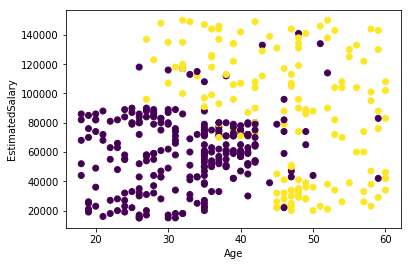

In [29]:
plt.scatter(df.iloc[:,2], df.iloc[:,3],c=df.iloc[:,-1])
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

In [30]:
X = df.iloc[:, [2, 3]]
y = df.iloc[:, 4]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [46]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [47]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Confusion Matrix:
[[88  8]
 [36 28]]
Accuracy: 0.79375


In [63]:
kernels = ['linear','poly', 'rbf', 'sigmoid']
accuracies = []
for k in kernels:
    classifier = SVC(kernel = k)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test,y_pred))

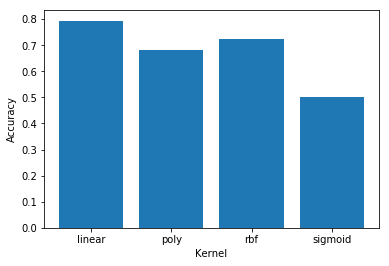

In [64]:
plt.bar(kernels,accuracies)
plt.xlabel('Kernel');plt.ylabel('Accuracy')
plt.show()

Linear kernel does well! -- more "complex" transformation does not always entail better results! (Although accuracy is not the only metric, as evidenced by the multitude of scores found in the "Classification Report") 